In [1]:
import numpy as np
import matplotlib.pyplot as plt 

PCA算法步骤
1. 中心化：对数据X特征的每个维度取均值，数据每个维度的值再减去相应的均值
2. 对中心化后的数据X'求协方差矩阵
3. 对协方差矩阵求特征之及特征向量
4. 对特征向量按特征值的大小降序排列，选择前k个特征向量组成变换矩阵
5. X'乘以变换矩阵，得到降维后的数据Y

In [38]:
def PCA(X,k):#X维度为m*n，m条数据，n条特征，k为指定降维后的特征维度，k<n
    m,n = X.shape
    if k >= n or k <1:
        k = n
    #中心化
    X = X - np.mean(X,axis=0,keepdims=True) 
    #求协方差矩阵
    cov_matrix = np.cov(X.T)#cov是按X的行计算协方差，但是我们是要按列计算，所以要转置
    #对协方差矩阵求特征之及特征向量
    eig_val, eig_vec = np.linalg.eig(cov_matrix)
    #对特征向量按特征值的大小降序排列
    eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(n)]
    eig_pairs.sort(reverse=True)
    #选择前k个特征向量组成变换矩阵
    feature=np.array([ele[1] for ele in eig_pairs[:k]]) 
    return np.dot(X,feature.T)

In [40]:
from sklearn.datasets import load_iris

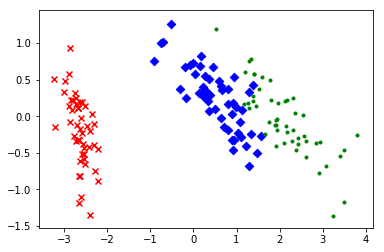

In [44]:
data = load_iris()
y = data.target#标签
X = data.data#原始特征向量为四位
reduced_x = PCA(X,2) #reduced_x为降维后的数据
red_x, red_y = [], []
blue_x, blue_y = [], []
green_x, green_y = [], []
 
for i in range(len(reduced_x)):#对不同花打点并着上不同色
    if y[i] == 0:
        red_x.append(reduced_x[i][0])
        red_y.append(reduced_x[i][1])
    elif y[i] == 1:
        blue_x.append(reduced_x[i][0])
        blue_y.append(reduced_x[i][1])
    else:
        green_x.append(reduced_x[i][0])
        green_y.append(reduced_x[i][1])
# 可视化
plt.scatter(red_x, red_y, c='r', marker='x')
plt.scatter(blue_x, blue_y, c='b', marker='D')
plt.scatter(green_x, green_y, c='g', marker='.')
plt.show()#可以看出对四位的特征向量降维后，数据较好的聚类在了一起